1. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

2. Explain our objective.

3. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

4. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

5. Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Haberman.csv into pandas dataFrame.
haberman = pd.read_csv("haberman.csv", names = 
                       ['Patient_age', 'Year_of_Operation', 'Auxilary_Node',
                        'Survival_status'])

In [12]:
# how many data-points and features?
print(haberman.shape)

(306, 4)


In [13]:
# What are the column names in our dataset?
print(haberman.columns)

Index(['Patient_age', 'Year_of_Operation', 'Auxilary_Node', 'Survival_status'], dtype='object')


In [14]:
haberman.head()

,Patient_age,Year_of_Operation,Auxilary_Node,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Attribute Information:

1. Age of patient at time of operation.
2. Patient's year of operation.
3. Number of positive axillary nodes detected.
4. Survival status (class attribute)

In [15]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Patient_age          306 non-null int64
Year_of_Operation    306 non-null int64
Auxilary_Node        306 non-null int64
Survival_status      306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


# Observation

1. There are 306 rows and  4 columns present.
2. All columns have int64 class datatype.

In [19]:
haberman["Survival_status"].value_counts()
#Haberman is a imbalanced dataset as the number of data points for every class is
#not the same.

1    225
2     81
Name: Survival_status, dtype: int64

# 2-D Scatter Plot

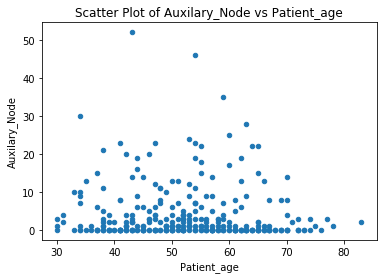

In [23]:
haberman.plot(kind='scatter',x = 'Patient_age', y='Auxilary_Node')
plt.title('Scatter Plot of Auxilary_Node vs Patient_age')
plt.show()

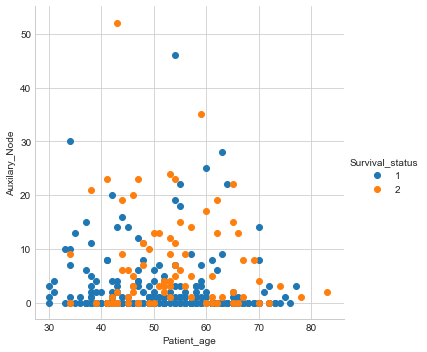

In [26]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Survival_status", size=5)\
    .map(plt.scatter, "Patient_age", "Auxilary_Node")\
    .add_legend()
plt.show()

# Pair-plot

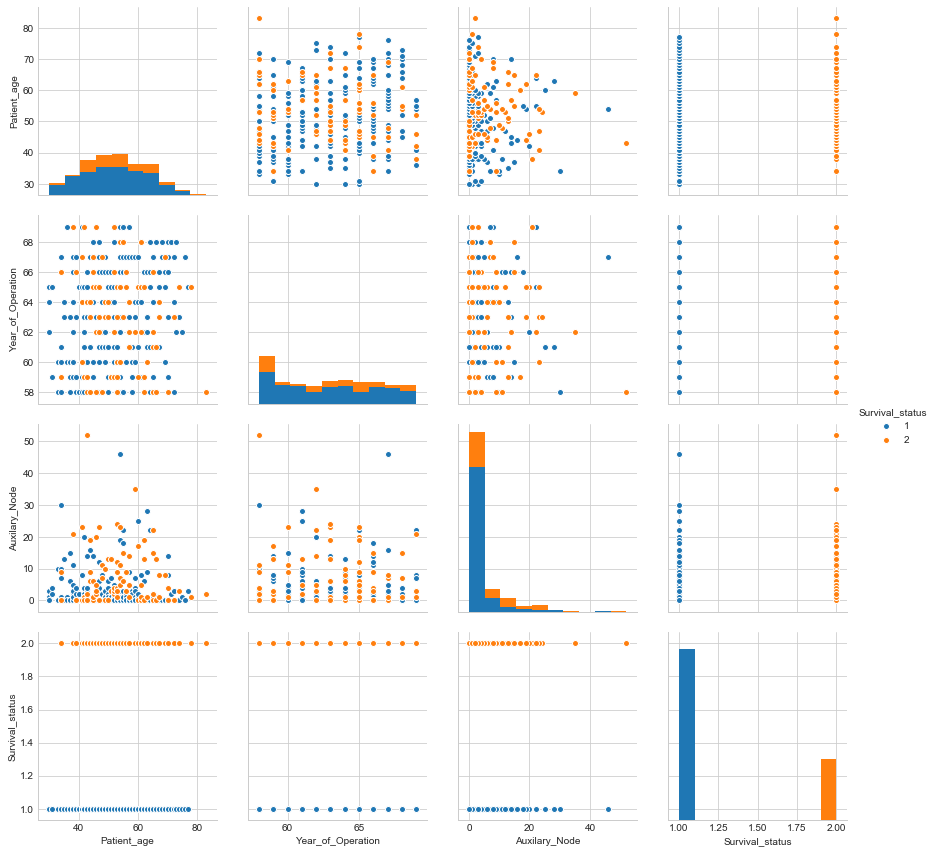

In [31]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="Survival_status",size=3)
plt.show()

# Histogram, PDF, CDF

Text(0.5,1,'Scatter Plot of Survival vs Auxilary_Node')

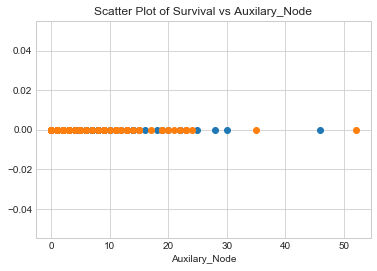

In [55]:
haberman_long_survived = haberman.loc[haberman['Survival_status']== 1]
haberman_short_survived = haberman.loc[haberman['Survival_status']== 2]

plt.plot(haberman_long_survived['Auxilary_Node'], 
         np.zeros_like(haberman_long_survived['Auxilary_Node']), 'o')
plt.plot(haberman_short_survived['Auxilary_Node'], 
         np.zeros_like(haberman_short_survived['Auxilary_Node']), 'o')

plt.xlabel('Auxilary_Node')
plt.title('Scatter Plot of Survival vs Auxilary_Node')

# PDF of Patient_age

C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


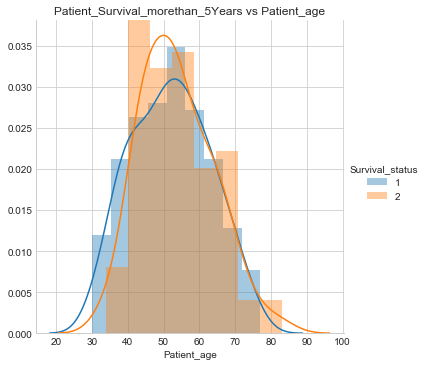

In [44]:
sns.FacetGrid(haberman, hue='Survival_status', size=5).map(sns.distplot, 'Patient_age').add_legend()
plt.title('Patient_Survival_morethan_5Years vs Patient_age')
plt.show()

# PDF of year_of_Operation

Here we are implementing "PDF of year fo operation" in this. It will be very difficult to come for any conclusion beacuse of most of the Survival Data Points are Overlapping.

C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Patient_Survival_morethan_5Years vs Year_of_Operation')

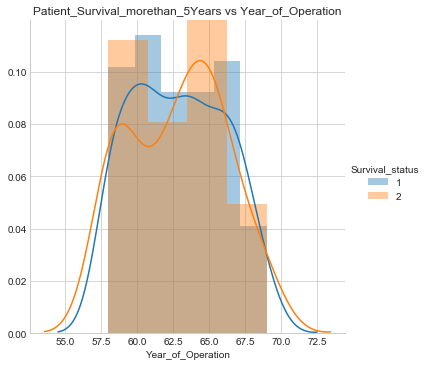

In [54]:
sns.FacetGrid(haberman, hue='Survival_status', size=5).map(sns.distplot,'Year_of_Operation').add_legend()
plt.title('Patient_Survival_morethan_5Years vs Year_of_Operation')

# PDF of Auxilary_Node

C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Goutam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Patient_Survival_morethan_5Years vs Auxilary_Node')

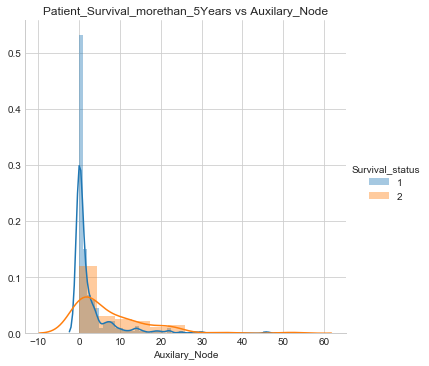

In [52]:
sns.FacetGrid(haberman, hue='Survival_status', size=5).map(sns.distplot,'Auxilary_Node').add_legend()
plt.title('Patient_Survival_morethan_5Years vs Auxilary_Node')

# CDF of Long_Survived

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


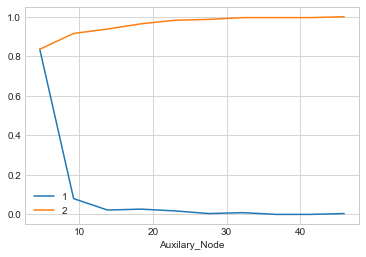

In [57]:
counts, bin_edges = np.histogram(haberman_long_survived['Auxilary_Node'], bins=10,
                                density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['1', '2'])
plt.xlabel('Auxilary_Node')
plt.show()

# CDF of Short_survived

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


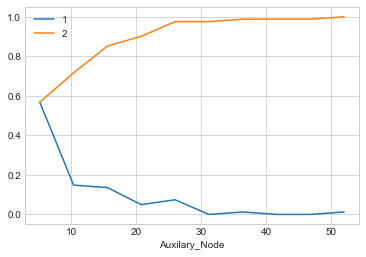

In [58]:
counts, bin_edges = np.histogram(haberman_short_survived['Auxilary_Node'], bins=10,
                                density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['1', '2'])
plt.xlabel('Auxilary_Node')
plt.show()

In [62]:
#Number of classes:
print(haberman['Survival_status'].unique())

[1 2]


In [63]:
#Data points per class:
print(haberman.groupby('Survival_status').count())

                 Patient_age  Year_of_Operation  Auxilary_Node
Survival_status                                               
1                        225                225            225
2                         81                 81             81


In [68]:
#Dataset through Mean, Variance and Standard deviation:
status_yes=haberman.loc[haberman["Survival_status"]==1]
status_no=haberman.loc[haberman["Survival_status"]==2]

print("SURVIVAL STATUS : YES -> STATISTICS :")
print(status_yes.describe())
print("\n****************************************************************************\n")
print("SURVIVAL STATUS : NO -> STATISTICS :")
print(status_no.describe())


SURVIVAL STATUS : YES -> STATISTICS :
       Patient_age  Year_of_Operation  Auxilary_Node  Survival_status
count   225.000000         225.000000     225.000000            225.0
mean     52.017778          62.862222       2.791111              1.0
std      11.012154           3.222915       5.870318              0.0
min      30.000000          58.000000       0.000000              1.0
25%      43.000000          60.000000       0.000000              1.0
50%      52.000000          63.000000       0.000000              1.0
75%      60.000000          66.000000       3.000000              1.0
max      77.000000          69.000000      46.000000              1.0

****************************************************************************

SURVIVAL STATUS : NO -> STATISTICS :
       Patient_age  Year_of_Operation  Auxilary_Node  Survival_status
count    81.000000          81.000000      81.000000             81.0
mean     53.679012          62.827160       7.456790              2.0
std   

# Analysis of Dataset through Medians, quantiles, median absolute deviation :

In [79]:
print("Meadians: \n")
print(np.median(status_yes["Patient_age"]))
print(np.median(status_no["Patient_age"]))
print(np.median(status_yes["Auxilary_Node"]))
print(np.median(status_no["Auxilary_Node"]))

print("\n**********************************************\n")

print("Quantiles: \n")
print(np.percentile(status_yes["Patient_age"], np.arange(0, 100, 25)))
print(np.percentile(status_no["Auxilary_Node"], np.arange(0, 100, 25)))
print(np.percentile(status_yes["Patient_age"], np.arange(0, 100, 25)))
print(np.percentile(status_no["Auxilary_Node"], np.arange(0, 100, 25)))

print("\n**********************************************\n")

from statsmodels import robust
print("MEDIAN ABSOLUTE DEVIATION :\n")
print("Survival Status : Yes")
print(robust.mad(status_yes["Patient_age"]))
print(robust.mad(status_yes["Auxilary_Node"]))
print("Survival Status : No")
print(robust.mad(status_no["Patient_age"]))
print(robust.mad(status_no["Auxilary_Node"]))

Meadians: 

52.0
53.0
0.0
4.0

**********************************************

Quantiles: 

[30. 43. 52. 60.]
[ 0.  1.  4. 11.]
[30. 43. 52. 60.]
[ 0.  1.  4. 11.]

**********************************************

MEDIAN ABSOLUTE DEVIATION :

Survival Status : Yes
13.343419966550417
0.0
Survival Status : No
11.860817748044816
5.930408874022408


# Box plot and Whuiskers

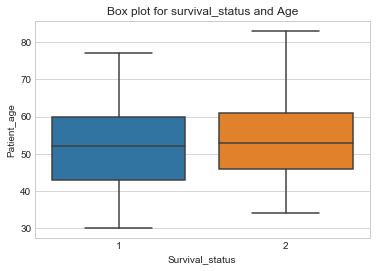

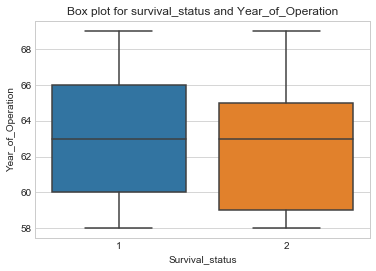

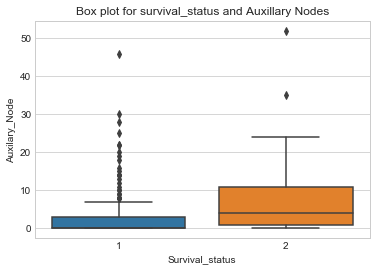

In [87]:
sns.boxplot(x="Survival_status", y="Patient_age", data=haberman)
plt.title("Box plot for survival_status and Age")
plt.show()

sns.boxplot(x="Survival_status", y="Year_of_Operation", data=haberman)
plt.title("Box plot for survival_status and Year_of_Operation")
plt.show()

sns.boxplot(x="Survival_status", y="Auxilary_Node", data=haberman)
plt.title("Box plot for survival_status and Auxillary Nodes")
plt.show()

#  Violin plots

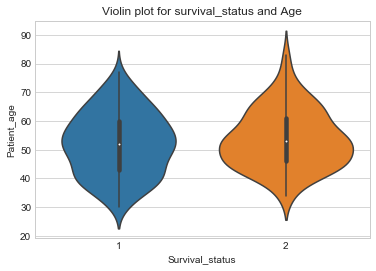

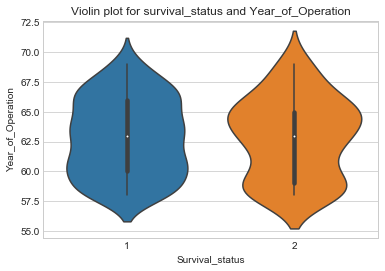

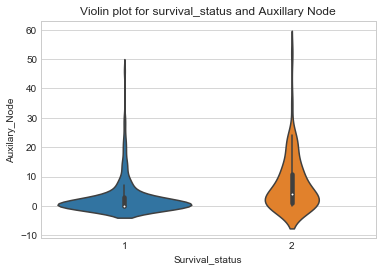

In [91]:
sns.violinplot(x="Survival_status", y="Patient_age", data=haberman)
plt.title("Violin plot for survival_status and Age")
plt.show()

sns.violinplot(x="Survival_status", y="Year_of_Operation", data=haberman)
plt.title("Violin plot for survival_status and Year_of_Operation")
plt.show()

sns.violinplot(x="Survival_status", y="Auxilary_Node", data=haberman)
plt.title("Violin plot for survival_status and Auxillary Node")
plt.show()

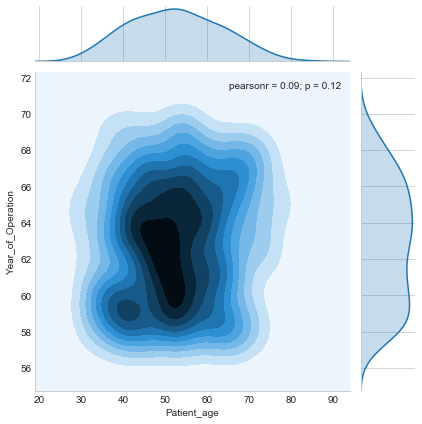

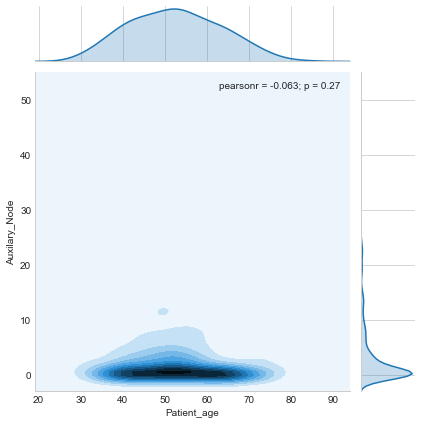

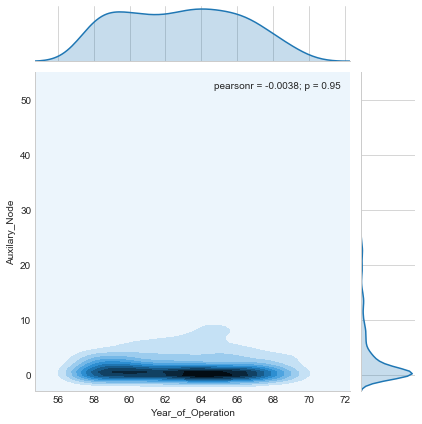

In [95]:
#Contour plot:
sns.jointplot(x="Patient_age", y="Year_of_Operation", data=haberman, kind='kde')
plt.show()

sns.jointplot(x="Patient_age", y="Auxilary_Node", data=haberman, kind='kde')
plt.show()

sns.jointplot(x="Year_of_Operation", y="Auxilary_Node", data=haberman, kind='kde')
plt.show()

# TOTAL OBSERVATIONS :

1. It's a Binary Classification Problem, We need to predict whether the patient will survive after 5 years or not based upon the patient's age, year of operation and the number of positive auxillary nodes.
2. Dataset is not balanced but complete as no single value is missing.
3. People with age range 40-60 have survived the most.
4. Operation year 60 had highest survival rate.
5. Operation year having range 63-66 had lowest survival rate.
6. Auxillary node=0 has the highest Survival rate.
7. Patients between age of range 30-34 survived after the treatment.
8. Patients with age > 77 were not able to survive.
9. Patients with Age < 40 and Auxillary nodes < 30 have higher chances of survival.
10. Patients with Age > 50 and Auxillary nodes > 10 has less chances of survival.
11. We can conclude from all the Pair Plots that they are not linearly Separable.
